In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import sklearn 


In [3]:

### nhập data và in ra kết quảquả

In [4]:
SaleFact = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='SalesFact')
Geography = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='Geography')
Product = pd.read_excel('C:\\Users\\Asus\\Downloads\\FORECASTING BUSINESS PERFORMANCE1.xlsx', sheet_name='Product')
print(SaleFact.head())
print(Geography.head())
print(Product.head())

   ProductID       Date    Zip  Units    Revenue          COGS
0       1228 2013-07-31  78773     12   19648.44  12309.747660
1        781 2014-03-12  90501     16   20351.52  13497.128064
2       2090 2013-11-29  44460     26  111367.62  91488.499830
3       1116 2018-08-29  30122     12   36280.44  21967.806420
4        993 2013-04-27  75789     14   55557.18  48645.866808
     Zip            City State Region      District
0  15201  Pittsburgh, PA    PA   East  District #13
1  15202  Pittsburgh, PA    PA   East  District #13
2  15203  Pittsburgh, PA    PA   East  District #13
3  15204  Pittsburgh, PA    PA   East  District #13
4  15205  Pittsburgh, PA    PA   East  District #13
  Category      Segment        Product  ProductID
0    Urban  Convenience  Maximus UC-01        536
1    Urban  Convenience  Maximus UC-02        537
2    Urban  Convenience  Maximus UC-03        538
3    Urban  Convenience  Maximus UC-04        539
4    Urban  Convenience  Maximus UC-05        540


In [5]:
### Làm sạch dữ liệu và chuẩn hóa để traintrain

In [6]:
SaleFact['Date'] = pd.to_datetime(SaleFact['Date'])
SaleFact['Revenue'] = SaleFact['Revenue'].replace('[\$,]', '', regex=True).astype(float)
SaleFact['COGS'] = SaleFact['COGS'].replace('[\$,]', '', regex=True).astype(float)
SaleFact['Year'] = SaleFact['Date'].dt.year
SaleFact['Month'] = SaleFact['Date'].dt.month
SaleFact['year_month'] = SaleFact['Date'].dt.strftime('%Y-%m')
SaleFact['year_month'] = SaleFact['Date'].dt.to_period('M')
SaleFact['Quarter'] = SaleFact['Date'].dt.quarter
SaleFact = SaleFact.dropna(subset=['Revenue'])  
SaleFact = SaleFact[~SaleFact['Revenue'].isin([float('inf'), float('-inf')])]  
Product = Product.drop_duplicates(subset=['ProductID'])
Geography = Geography.drop_duplicates(subset=['Zip'])
print(SaleFact.head())
print(Product.head())
print(Geography.head())

   ProductID       Date    Zip  Units    Revenue          COGS  Year  Month  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660  2013      7   
1        781 2014-03-12  90501     16   20351.52  13497.128064  2014      3   
2       2090 2013-11-29  44460     26  111367.62  91488.499830  2013     11   
3       1116 2018-08-29  30122     12   36280.44  21967.806420  2018      8   
4        993 2013-04-27  75789     14   55557.18  48645.866808  2013      4   

  year_month  Quarter  
0    2013-07        3  
1    2014-03        1  
2    2013-11        4  
3    2018-08        3  
4    2013-04        2  
  Category      Segment        Product  ProductID
0    Urban  Convenience  Maximus UC-01        536
1    Urban  Convenience  Maximus UC-02        537
2    Urban  Convenience  Maximus UC-03        538
3    Urban  Convenience  Maximus UC-04        539
4    Urban  Convenience  Maximus UC-05        540
     Zip            City State Region      District
0  15201  Pittsburgh, PA    P

In [7]:
print(SaleFact.shape)       # Số dòng, số cột
print(SaleFact.dtypes)      # Kiểu dữ liệu của từng cột
print(SaleFact.head())      # Xem trước vài dòng dữ liệu
print(SaleFact.isnull().sum())  # Kiểm tra dữ liệu bị thiếu

(976202, 10)
ProductID              int64
Date          datetime64[ns]
Zip                    int64
Units                  int64
Revenue              float64
COGS                 float64
Year                   int32
Month                  int32
year_month         period[M]
Quarter                int32
dtype: object
   ProductID       Date    Zip  Units    Revenue          COGS  Year  Month  \
0       1228 2013-07-31  78773     12   19648.44  12309.747660  2013      7   
1        781 2014-03-12  90501     16   20351.52  13497.128064  2014      3   
2       2090 2013-11-29  44460     26  111367.62  91488.499830  2013     11   
3       1116 2018-08-29  30122     12   36280.44  21967.806420  2018      8   
4        993 2013-04-27  75789     14   55557.18  48645.866808  2013      4   

  year_month  Quarter  
0    2013-07        3  
1    2014-03        1  
2    2013-11        4  
3    2018-08        3  
4    2013-04        2  
ProductID     0
Date          0
Zip           0
Units         0


In [8]:
## Thống kê giá trị của cột Revenue và sử dụng Boxplot để kiểm tra giá trị ngoại lai

count    976202.000000
mean       5837.443431
std        4659.683857
min         427.770000
25%        2141.370000
50%        4724.370000
75%        8564.850000
max      334548.900000
Name: Revenue, dtype: float64


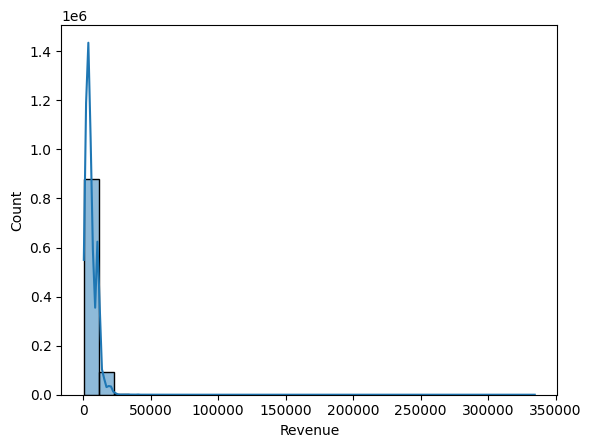

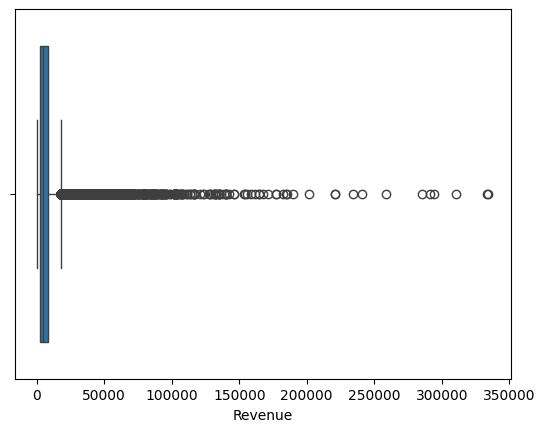

In [9]:
print(SaleFact['Revenue'].describe())  # Thống kê cơ bản của cột Revenue
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(SaleFact['Revenue'], bins=30, kde=True)  # Biểu đồ phân phối
plt.show()
sns.boxplot(x=SaleFact['Revenue'])  # Boxplot kiểm tra giá trị ngoại lai
plt.show()

In [10]:
## Biểu đồ thể hiện biến động doanh thu theo năm

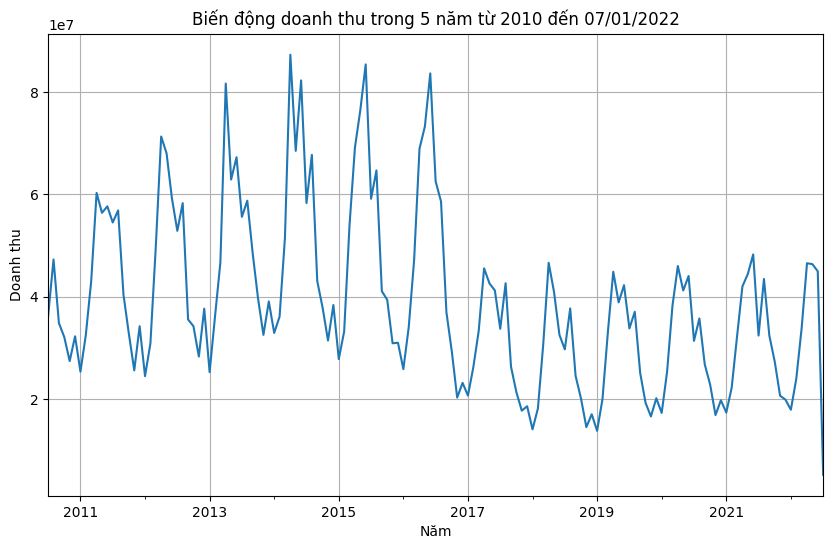

In [11]:

revenue_by_year_month = SaleFact.groupby(['year_month'])['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_year_month.plot(kind='line',marker='')
plt.title('Biến động doanh thu trong 5 năm từ 2010 đến 07/01/2022')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [12]:
# Biểu đồ xu hướng doanh thu theo tháng

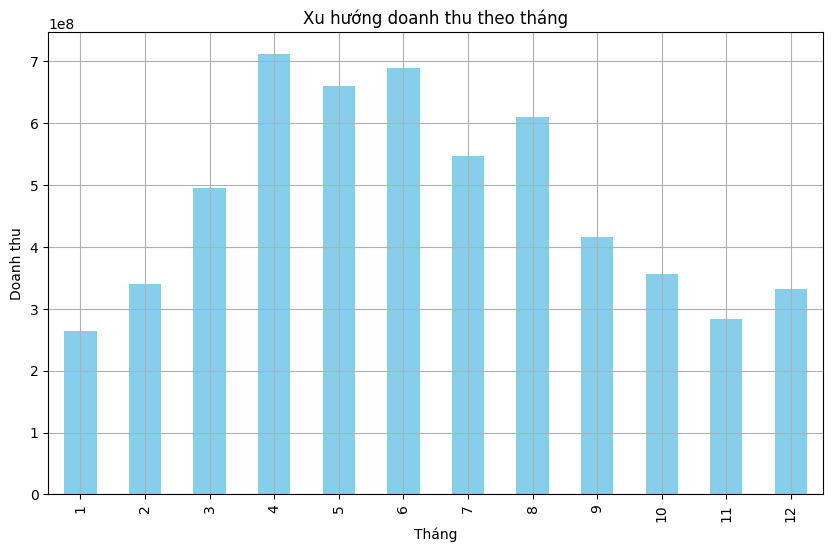

In [13]:
revenue_by_month = SaleFact.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar', color='skyblue')
plt.title('Xu hướng doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [14]:
## Biểu đồ đánh giá tổng doanh thu theo quý 

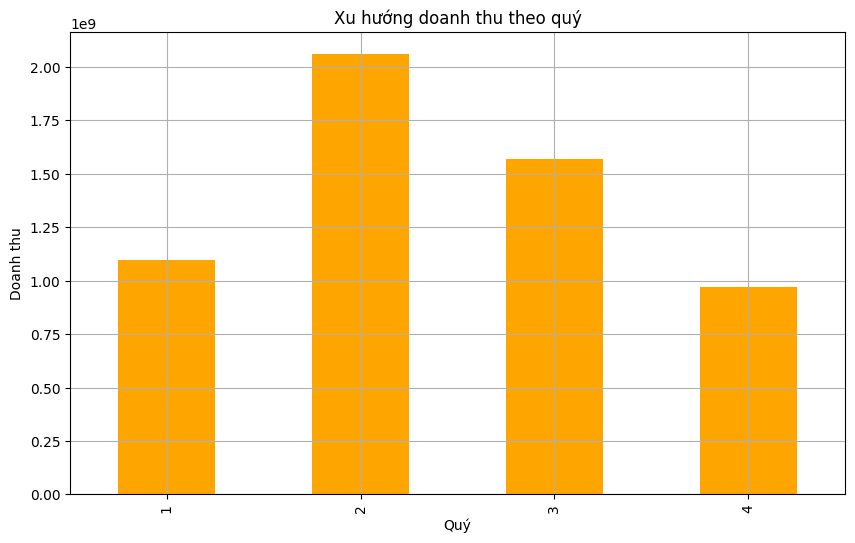

In [15]:
revenue_by_quarter = SaleFact.groupby('Quarter')['Revenue'].sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
revenue_by_quarter.plot(kind='bar', color='orange')
plt.title('Xu hướng doanh thu theo quý')
plt.xlabel('Quý')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [16]:
## Biểu đồ xu hướng số lượng sản phẩm bán qua thời gian

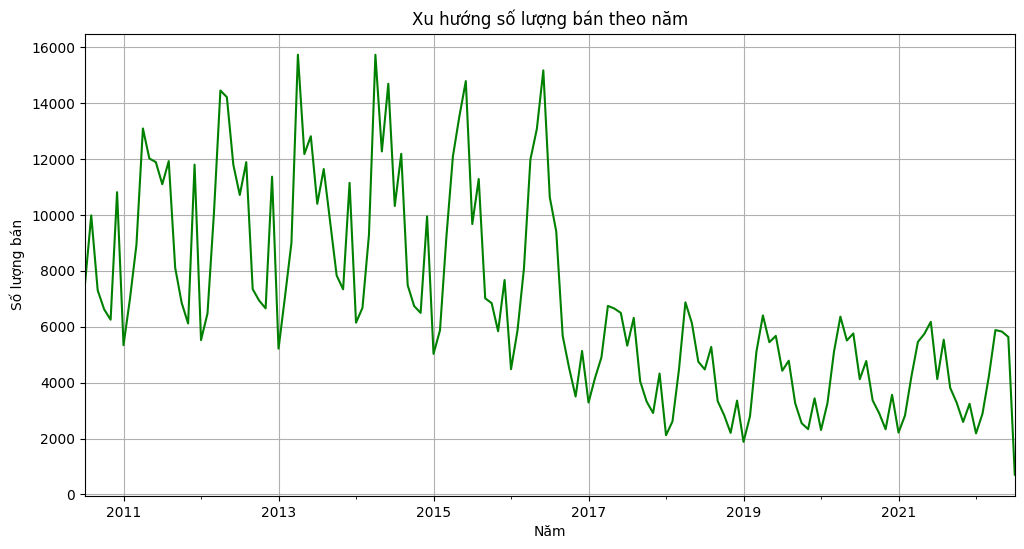

In [17]:

units_by_year = SaleFact.groupby('year_month')['Units'].sum()
plt.figure(figsize=(12, 6))
units_by_year.plot(kind='line', marker='', color='green')
plt.title('Xu hướng số lượng bán theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng bán')
plt.grid(True)
plt.show()

In [18]:
## Biểu đồ doanh thu theo khu vực 

     Zip            City State Region      District  ProductID       Date  \
0  15201  Pittsburgh, PA    PA   East  District #13      604.0 2013-07-17   
1  15201  Pittsburgh, PA    PA   East  District #13      475.0 2010-07-27   
2  15201  Pittsburgh, PA    PA   East  District #13      396.0 2012-11-12   
3  15201  Pittsburgh, PA    PA   East  District #13      449.0 2020-07-04   
4  15201  Pittsburgh, PA    PA   East  District #13     2045.0 2015-04-24   

   Units   Revenue          COGS    Year  Month year_month  Quarter  
0    1.0   5981.85   4038.346935  2013.0    7.0    2013-07      3.0  
1    1.0  12448.80   9915.469200  2010.0    7.0    2010-07      3.0  
2    1.0  10927.35   9998.525250  2012.0   11.0    2012-11      4.0  
3    1.0  12284.37  10995.739587  2020.0    7.0    2020-07      3.0  
4    1.0   5606.37   3016.227060  2015.0    4.0    2015-04      2.0  


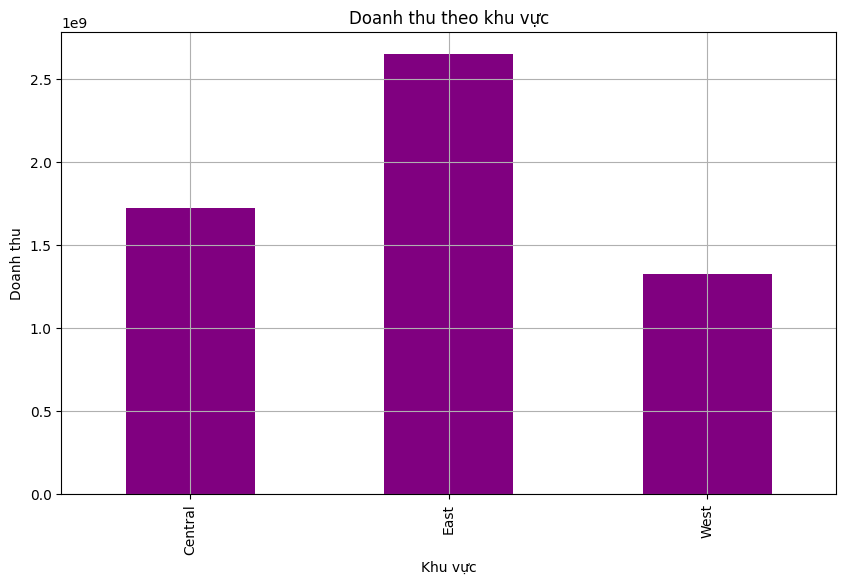

In [19]:
SaleFact_Geo = Geography.merge(SaleFact, how= "left",on="Zip")
print(SaleFact_Geo.head())
revenue_by_region = SaleFact_Geo.groupby('Region')['Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar', color='purple')
plt.title('Doanh thu theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [20]:
## Biểu đồ doanh thu theo dòng sản phẩm
### Trong data, vì số lượng cụ thể của các sản phẩm rất lớn nên nhóm chúng em đã chỉ lấy từ đầu của các dòng sản phẩm để làm biểu đồ

       Category       Segment        Product  ProductID       Date      Zip  \
0         Urban   Convenience  Maximus UC-01        536 2013-02-19  98424.0   
1         Urban   Convenience  Maximus UC-01        536 2013-02-22  62002.0   
2         Urban   Convenience  Maximus UC-01        536 2013-04-26  84310.0   
3         Urban   Convenience  Maximus UC-01        536 2013-04-10  35603.0   
4         Urban   Convenience  Maximus UC-01        536 2013-06-10  21655.0   
...         ...           ...            ...        ...        ...      ...   
976853      Mix  Productivity   Quibus MP-32       1264 2020-06-30  90260.0   
976854      Mix  Productivity   Quibus MP-32       1264 2020-02-24   2717.0   
976855      Mix  Productivity   Quibus MP-32       1264 2022-05-24  45638.0   
976856      Mix  Productivity   Quibus MP-32       1264 2020-03-17  92886.0   
976857      Mix  Productivity   Quibus MP-32       1264 2020-01-09  94038.0   

        Units   Revenue          COGS    Year  Mont

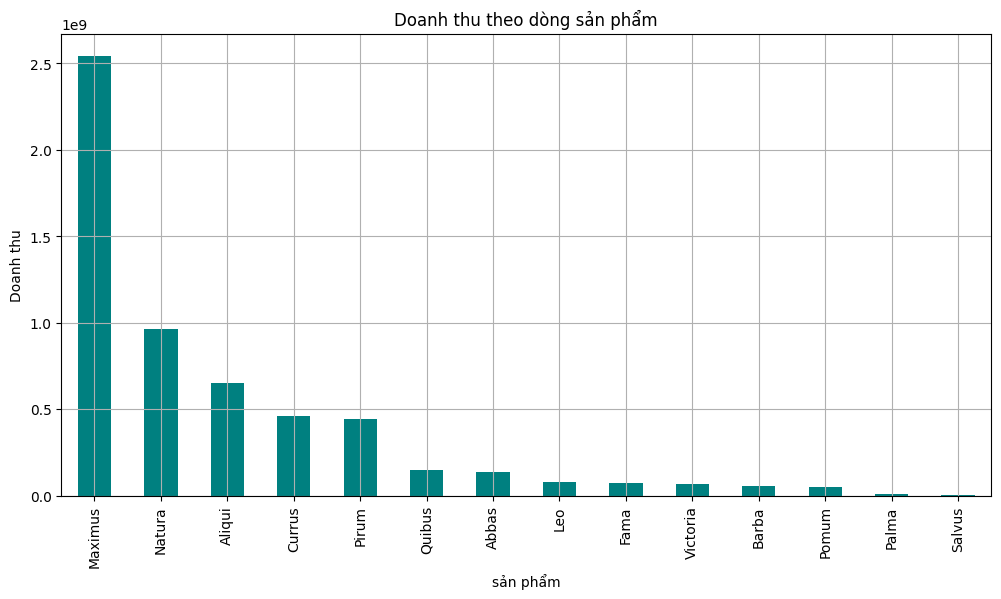

In [21]:
SaleFact_Product = Product.merge(SaleFact, how='left',on="ProductID")
print(SaleFact_Product)
SaleFact_Product['Partition'] = SaleFact_Product['Product'].str.extract(r'^(\w+)')
revenue_by_product = SaleFact_Product.groupby('Partition')['Revenue'].sum()
plt.figure(figsize=(12, 6))
revenue_by_product.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Doanh thu theo dòng sản phẩm')
plt.xlabel('sản phẩm')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [22]:
## Hàm tính toán chỉ số diff
### Tuy đề bài đã đề cập sử dụng phương sai bậc 1 nhưng do sơ suất, dữ liệu đã không dừng nên chúng em tạo một hàm để tính toán phương sai 1 cách chính xác 

In [23]:

def adfuller_test(series, name=""):
    result = adfuller(series, autolag='AIC')
    labels = ["ADF Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]
    output = dict(zip(labels, result[:4]))
    print(f"\n Kiểm tra tính dừng của {name if name else 'chuỗi dữ liệu'}:")
    for key, value in output.items():
        print(f"🔹 {key}: {value:.6f}")
    if result[1] <= 0.05:
        print(" Dữ liệu đã dừng (Reject Ho)")
        return True
    else:
        print(" Dữ liệu không dừng (Fail to Reject Ho)")
        return False
def make_stationary(series, max_d=3):
    diff_level = 0
    temp_series = series.copy()
    
    while diff_level < max_d:
        if adfuller_test(temp_series, name=f"Dữ liệu sau sai phân bậc {diff_level}"):
            break
        temp_series = temp_series.diff().dropna()
        diff_level += 1
    return temp_series, diff_level

In [24]:
## Vẽ sơ đồ sự khác nhau giữa dữ liệu gốc và dữ liệu sau khi phân bố bậc diff_used


 Kiểm tra tính dừng của Dữ liệu sau sai phân bậc 0:
🔹 ADF Test Statistic: -0.440097
🔹 p-value: 0.903186
🔹 #Lags Used: 12.000000
🔹 Number of Observations Used: 132.000000
 Dữ liệu không dừng (Fail to Reject Ho)

 Kiểm tra tính dừng của Dữ liệu sau sai phân bậc 1:
🔹 ADF Test Statistic: -4.000802
🔹 p-value: 0.001406
🔹 #Lags Used: 11.000000
🔹 Number of Observations Used: 132.000000
 Dữ liệu đã dừng (Reject Ho)
Số bậc sai phân đã sử dụng: 1


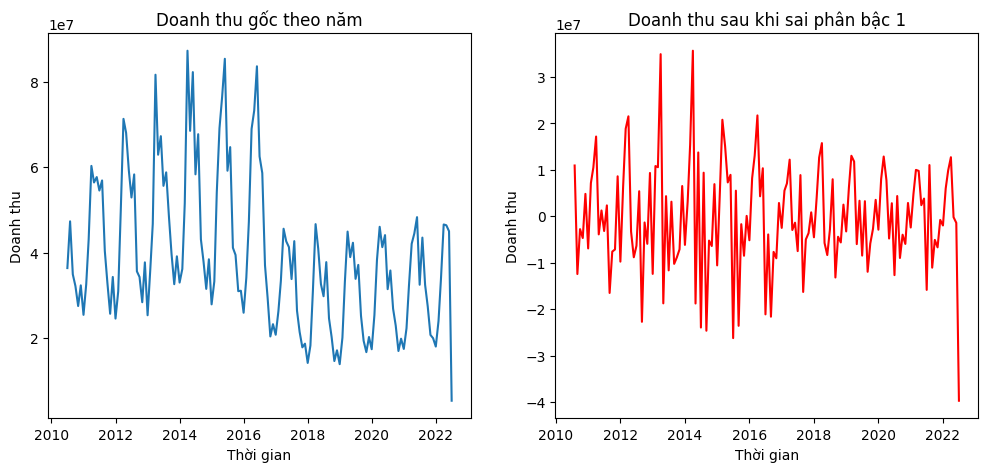

In [25]:

SaleFact['year_month'] = SaleFact['year_month'].dt.to_timestamp()
sampled_data = SaleFact.groupby('year_month')['Revenue'].sum()

if isinstance(sampled_data.index, pd.PeriodIndex):
    sampled_data.index = sampled_data.index.to_timestamp()

stationary_data, diff_used = make_stationary(sampled_data)

if isinstance(stationary_data.index, pd.PeriodIndex):
    stationary_data.index = stationary_data.index.to_timestamp()

plt.figure(figsize=(12, 5))
print(f"Số bậc sai phân đã sử dụng: {diff_used}")

# Biểu đồ doanh thu gốc
plt.subplot(1, 2, 1)
plt.plot(sampled_data.index, sampled_data.values, marker='', linestyle='-')
plt.title("Doanh thu gốc theo năm")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu")

# Biểu đồ doanh thu sau khi sai phân
plt.subplot(1, 2, 2)
plt.plot(stationary_data.index, stationary_data.values, marker='', linestyle='-', color='red')
plt.title(f"Doanh thu sau khi sai phân bậc {diff_used}")
plt.xlabel("Thời gian")
plt.ylabel("Doanh thu")

plt.show()

In [26]:
## Mô hình tự hồi quyquy

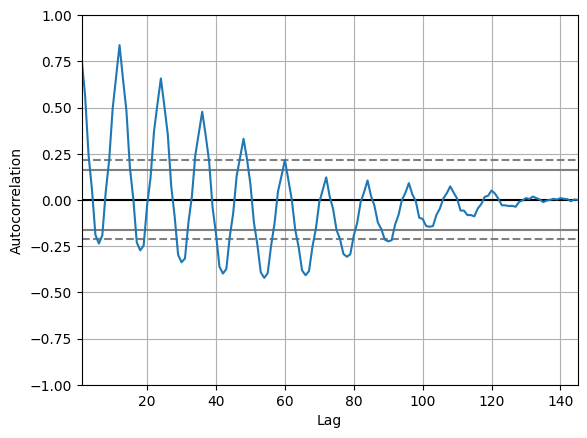

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampled_data)
plt.show()

In [28]:
### vì chúng ta lấy dữ liệu doanh thu theo tháng nên chúng ta lấy chỉ số lag là 30
### Xét theo biểu : 
### ACF: Giá trị đầu tiên vượt ra khỏi khoảng tin cậy là lag = 1  hoặc lag = 2 => q = 1 hoặc q = 2, tại các lag 12,24. 36 nên P có thể là 1 hoặc 2
### PACF: Giá trị đầu tiên vượt ra khỏi khoảng tin cậy là lag = 1 hoặc lag = 2 => p = 2 hoặc p = 3, tại các lag 12,24 nên Q có thể là 1 hoặc 2


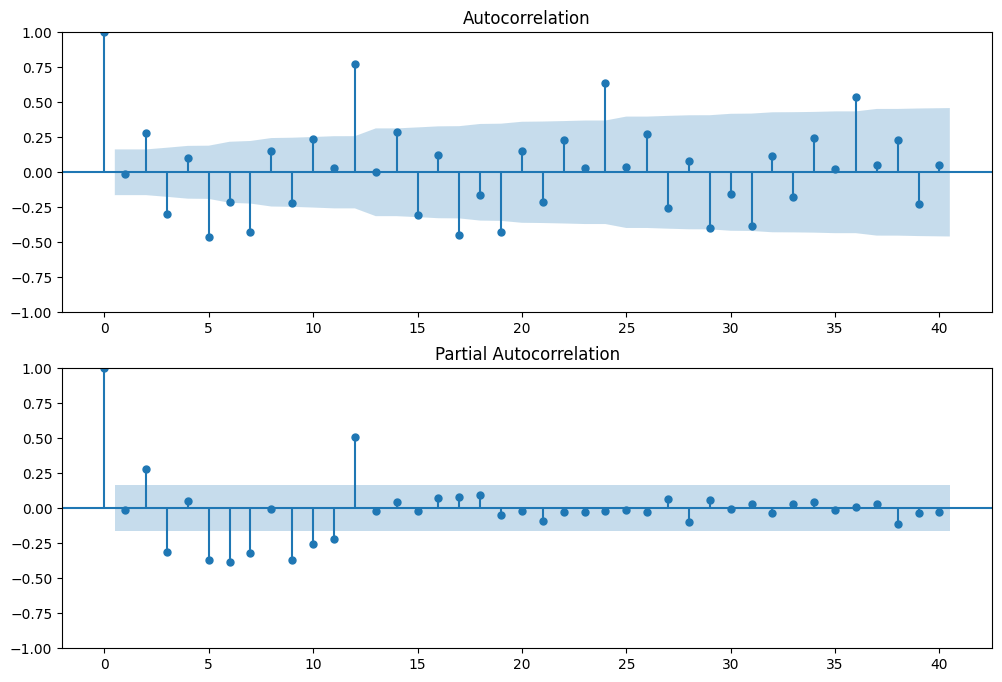

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stationary_data,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stationary_data,lags=40,ax=ax2)

In [30]:
## Chạy mô hình dự đoán Arima

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


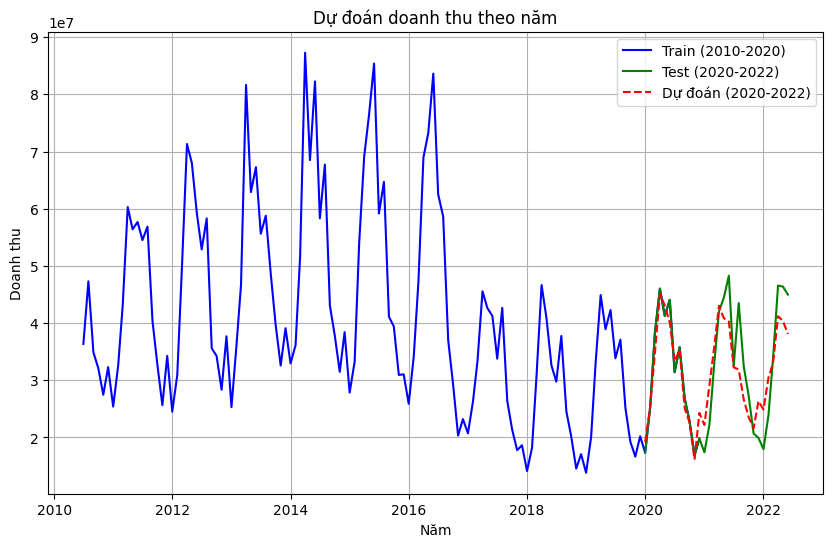

In [ ]:
# p = 1 hoặc 2. q = 2 hoặc 3
from statsmodels.tsa.arima.model import ARIMA 

SaleFact['year_month'] = SaleFact['Date'].dt.to_period('M')
SaleFact_yearly = SaleFact.groupby('year_month')['Revenue'].sum()

# Chuyển đổi chỉ mục thành kiểu datetime để có thể cắt lát theo năm
SaleFact_yearly.index = SaleFact_yearly.index.to_timestamp()

# Chia tập train (2012-2020) và tập test (2020-2022)
train = SaleFact_yearly.loc['2010-01-01':'2020-12-31']
test = SaleFact_yearly.loc['2020-01-01':'2022-06-30'] # tháng 7 có chỉ số Revenue không đầy đủ

# Xây dựng mô hình ARIMA trên tập train
model = ARIMA(train, order=(1, diff_used, 2))
model_fit = model.fit()

# Dự đoán trên tập test
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train (2010-2020)', color='blue')
plt.plot(test.index, test, label='Test (2020-2022)', color='green')
plt.plot(test.index, forecast, label='Dự đoán (2020-2022)', color='red', linestyle='--')
plt.title('Dự đoán doanh thu theo năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Chạy mô hình SArimaArima

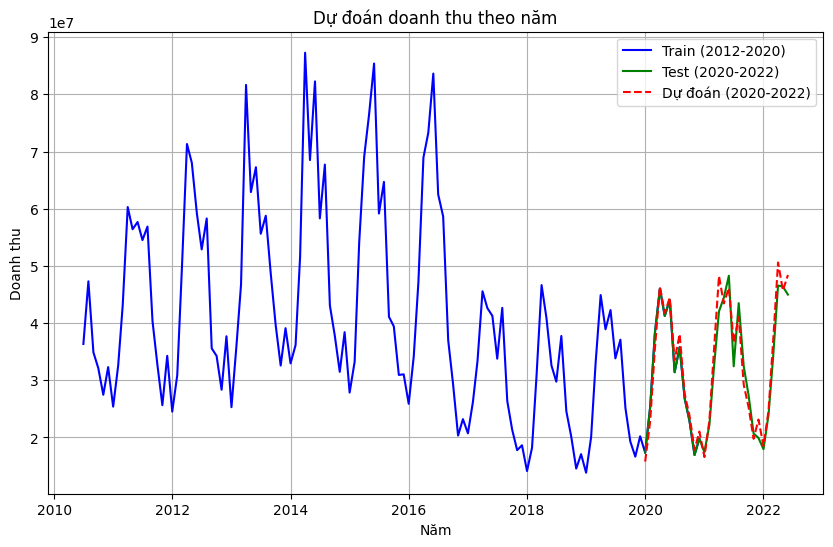

In [33]:
#P =1 hoặc 2. Q = 1 hoặc 2
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, diff_used, 3),seasonal_order=(1,diff_used,2,12))
results=model1.fit()
forecast_steps1 = len(test)
forecast1 = results.forecast(steps=forecast_steps1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train (2012-2020)', color='blue')
plt.plot(test.index, test, label='Test (2020-2022)', color='green')
plt.plot(test.index, forecast1, label='Dự đoán (2020-2022)', color='red', linestyle='--')
plt.title('Dự đoán doanh thu theo năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# from pmdarima import auto_arima

# stepwise_model = auto_arima(train, seasonal=False, m=12, trace=True,
#                             error_action='ignore', suppress_warnings=True)
# print(stepwise_model.summary())

In [35]:
#Kiểm tra mô hình

In [39]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Tính R-Squared (R²)
r2 = r2_score(test, forecast)
print(f" R-Squared (R²): {r2:.4f}")

# Tính Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# Tính Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f" RMSE: {rmse:.4f}")

 R-Squared (R²): 0.8047
MAPE: 13.58%
 RMSE: 4660084.3246


In [37]:
r2 = r2_score(test, forecast1)
print(f" R-Squared (R²): {r2:.4f}")

# Tính Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test - forecast1) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# Tính Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast1))
print(f" RMSE: {rmse:.4f}")

 R-Squared (R²): 0.9491
MAPE: 7.64%
 RMSE: 2378114.8259


In [38]:
# from statsmodels.tsa.api import VAR 
# model bgh iobphiy ;hk/ 